# CHARISMA: Fourier transform Raman peak interpolation

after Hutsebaut, Didier, Peter Vandenabeele, and Luc Moens. "Evaluation of an accurate calibration and spectral standardization procedure for Raman spectroscopy." Analyst 130.8 (2005): 1204-1214.

James Thomson & Bastian Barton, May 18, 2021

In [196]:
## Pixel start and stop positions, for x-axis
freq_start = 845
freq_stop = 856

In [197]:
## Pixel series for x-axis
x = np.linspace(freq_start,freq_stop,(freq_stop-freq_start+1))

In [198]:
## Intensity series for Peak
y = np.array([11065.8,14503.13,18909.2,27798.07,46242.13,62690.6,50688.33,27785.47,14060.27,8208.467,5984.533,5286.533])

In [199]:
# Normalize
y -= np.min(y)
y /= np.max(y)

In [200]:
# x and y have even lengths, which is bad for FFT centering. Truncate last value:
y = y[:-1]
x = x[:-1]

In [201]:
%matplotlib inline

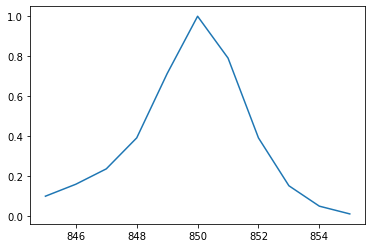

In [202]:
plt.figure()
plt.plot(x, y)

Fourier transform, extended 64-fold by zero filling

In [203]:
## Tranform intensities into fourier domain
y_f = np.fft.fft(y)

C:\Users\barton\.conda\envs\Extended_LBF\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


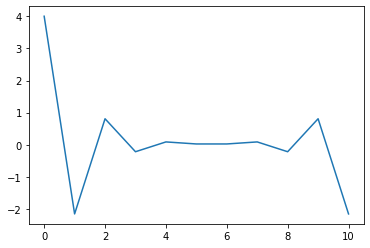

In [204]:
# Check FFT modulus
plt.figure()
plt.plot(y_f)

C:\Users\barton\.conda\envs\Extended_LBF\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


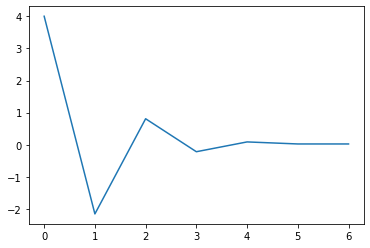

In [205]:
# Information is contained in left half
plt.figure()
plt.plot(y_f[0:7])

In [206]:
len(y_f)

11

In [209]:
len(y_f)//2+2

7

Pad middle (large periodicities) with zeros

In [210]:
zeropad = np.zeros(2000)
ext_y_f = np.hstack((y_f[0:7], zeropad, y_f[7:]))
ext_y_f.shape

(2011,)

C:\Users\barton\.conda\envs\Extended_LBF\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


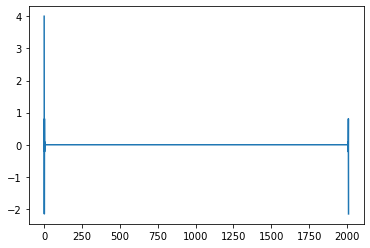

In [211]:
plt.figure()
plt.plot(ext_y_f)

In [215]:
## Inverse FFT
y_if = np.real(np.fft.ifft(ext_y_f))
y_if -= np.min(y_if)
y_if /= np.max(y_if)

In [216]:
## Create new x-axis
ext_x = np.linspace(freq_start,freq_stop,len(y_if))

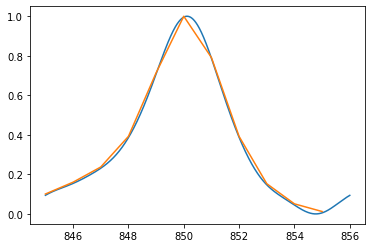

In [217]:
plt.figure()
plt.plot(ext_x, y_if)
plt.plot(x,y)

Cut out peak tip & fit parabola

In [241]:
d = 200
x1 = ext_x[np.argmax(y_if)-d:np.argmax(y_if)+d]
y1 = y_if[np.argmax(y_if)-d:np.argmax(y_if)+d]

In [232]:
z = np.polyfit(x1,y1,2)

In [233]:
p = np.poly1d(z)

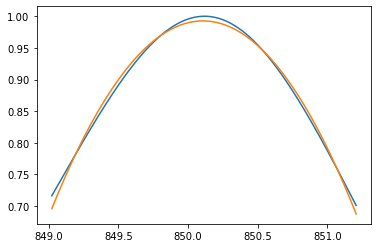

In [234]:
plt.figure()
plt.plot(x1,y1)
plt.plot(x1, p(x1))

Looks nice for this here data. Maximum of fitted peak at:

In [237]:
x1[np.argmax(p(x1))]

850.1059701492537